# 심층 신경망 (DNN : Deep Neural Network)

### 인공신경망의 종류

- **DNN(Deep Neural Network : 심층 신경망)** 
- CNN(Convolution Neural Network : 합성곱 신경망)  
- RNN(Recurrent Neural Network : 순환 싱경망)  
- Long Short-Term Memory (LSTM)  
- Deep Feedforward Network (DFN)  

### 심층 신경망
- 심층 신경망 개념    
- 활성화 함수 
- 옵티마이저 
- loss : 손실함수 
- metrics  

## 심층 신경망

- 여러 개의 밀집층으로 이루어진 신경망    
    - 각 입력 노드가 모든 출력 노드에 연결되어 있는 완전연결층(Fully Connected Layer)   
    - 밀집층(Dense Layer) : 신경망에서 가장 기본적인 층  
      - 복잡한 패턴이나 관계를 학습하고, 
      - 이를 기반으로 분류, 회귀 등의 작업을 수행 후 결과 예측
          - 분류 예측 : 확률값 반환  
          - 회귀 예측 : 특정값 반환   

- 하나의 입력층과 하나의 출력증, 다수의 은닉층으로 구성  
- 은닉층과 출력층에 활성화 함수 포함    
    - 은닉층에서는 자유롭게 활성화 함수 사용  
    - 출력층 활성화 함수는 제한적   
        - 이진 분류 : 시그모이드  
        - 다중 분류 : 소프트맥스   
    - 분류 : 확률 계산을 위해 활성화 함수 필요    
    - 회귀 : 임의의 값 출력으로 선형방정식 계산을 그대로 출력하므로
        - 활성화 함수 지정하지 않음       

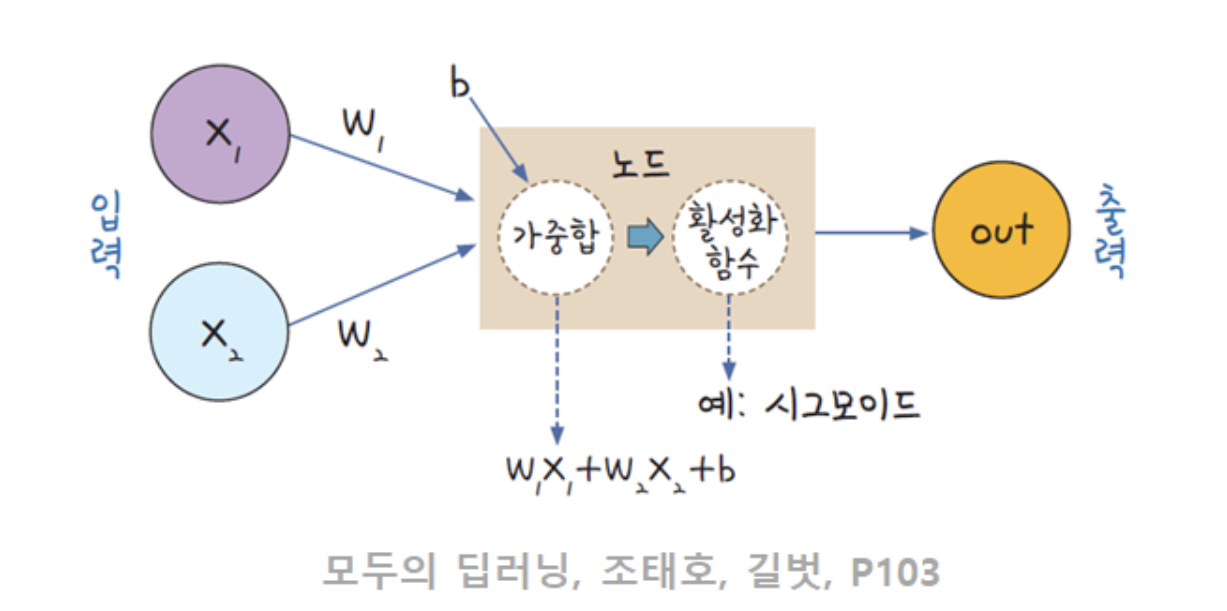

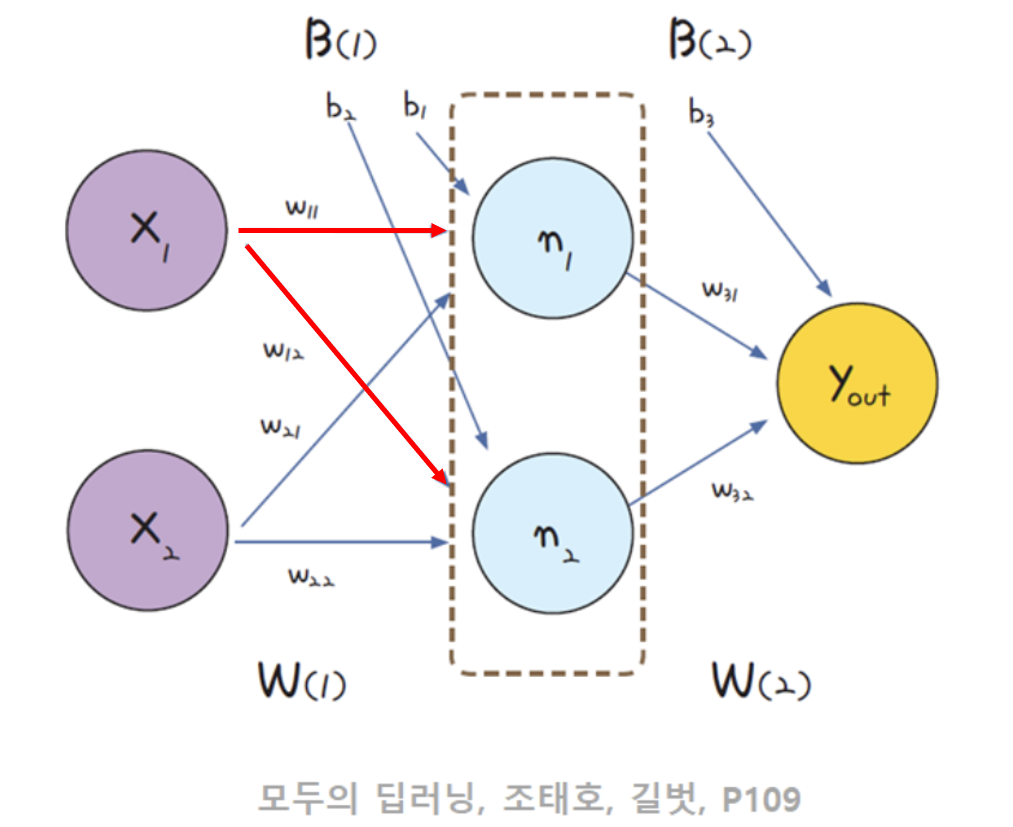

### 위 그림의 구조 
- 은닉층 : Dense(2, input_shape=(2,), activation='relu')
- 출력층 : Dense(1, activation='sigmoid')

### 각 층의 각 노드에서의 연산   
- 은닉층 : 출력수 2개를 위한 연산  
    - (1) n1노드에서의 연산 : y = x1 * w11 + x2 * w21 + b1 (가중합)  
            - n1노드의 가중합(다 더해진 값)이 활성화 함수의 입력으로 들어감   
            - n1의 활성화 함수 결과가 n1의 출력값  
    - (2) n2노드에서의 연산 : y = x1 * w12 + x2 * w22 + b2   
            - n2노드의 가중합(다 더해진 값)이 활성화 함수의 입력으로 들어감   
            - n2의 활성화 함수 결과가 n2의 출력값  
- 출력층 : 출력수 1개를 위한 연산  
    - (1) y = n1 * w31 + n2 * w32 + b  
        - y 노드의 가중합(다 더해진 값)이 활성화 함수의 입력으로 들어감 
        - y의 활성화 함수 결과 출력 (1개 값 출력) 

### 파라미터 수 (간선 수)  
- 첫 번째 층 : (2 + 1) x 2 = 4 + 2 = 6  
    -  (입력수 + 1) x 출력수 = 입력수 x 출력수 + 출력수  
- 두 번째 층 : (2 + 1) x 1 = 2 + 1 = 3   
- 총 파라미터 수(총 간선 수) : 9  


### Dense 층 입력 차원 - 1차원
- 주의! Dense 층에는 1차원 데이터만 입력 가능 
- Dense(100, activation='sigmoid', input_shape=(784,)) # 은닉층
- Dense(10, activation='softmax') # 출력층
  - 첫 번째 층 : 은닉층으로 100개의 뉴런을 가진 밀집층이라고 표현
  - 입력 수 1차원 벡터로 784개 값 
  - 출력(유닛 또는 뉴런) : 100
  - 유닛수를 정하는 기준은 없으나 일반적으로 출력층의 출력수(10)보다는 많게 정함 
    - 출력츠에서 클래스 10개에 대한 확률을 예측하는데
    - 출력수 10보다 작으면 적은 정보를 전달하게 됨  
  - 784개의 입력이 100개의 출력이 되는 것 이므로 
    - 데이터가 상당히 압축(특성추출)된다고 봐야 함
- 다른 층과 섞어서 사용할 경우 반드시 1차원으로 변환 후 입력해야 함
- Flatten() 사용해서 평탄화 작업 수행  
    - Conv2D(64, (3, 3), activation='relu'),  
    - MaxPooling2D((2, 2)), 
    - Flatten(),  
    - Dense(512, activation='relu')  

### 층 추가 방법

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential # Sequential : 신경망프레임  모듈
from keras.layers import Dense

In [6]:
# 방법1
model = Sequential(name='이미지분류')
model.add(Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')) #은닉층 , 이때 이름 한국어로 하면 오류난다.
model.add(Dense(10, activation='softmax', name='output')) # 출력층 
# Dense층 name에 한글 오류

In [3]:
model.summary()

Model: "이미지분류"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 방법2 sequential로 하나로 묶어서
model = Sequential([
            Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'), #은닉층  
            Dense(10, activation='softmax', name='output')
            ], name='이미지분류')

In [9]:
model.summary()

Model: "이미지분류"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
##################################################################################

## 활성화 함수

### 활성화 함수 (Activation Function)
- 각 노드에서 가중합을 구한 뒤 출력 결과를 산출하기 위해 거치는 함수  
- 입력 데이터를 다음 레이어로 어떻게 출력하느냐를 결정하는 역할  
- 활성화 함수로는 비선형 함수를 사용하여 층을 쌓아 나감  
  - 신경망에서 선형 함수를 사용하게 되면 직선형태로 층을 깊게하는 의미가 없어짐    
- 층마다 다른 활성화 함수 사용  
  - 은닉층 : 비선형으로 각 층에서 처리하는 일을 분리하는 것이 목적 
  - 출력층 : 출력하려는 목적에 따라 활성화 함수 결정 
    - 분류  
        - 이진 분류 : sigmoid 
        - 다중 분류 : softmax 
    - 회귀 : 활성화 함수 사용하지 않음  
- 활성화 함수 : activation 사용해서 설정

---
### 활성화 함수 종류
  - sigmoid
  - relu
  - softmax
  - tanh

#### Sigmoid

- 'S자 모양'
- 출력 값의 범위 : 0과 1사이  
    - 입력값이 큰 음수 값일수록 0에 가까워지고 큰 양수 값일수록 1이 됨  
- 함수의 중심이 0이 아니기에 학습이 느려지는 단점
  - zigzag 현상 
    - 손실(loss)가 가장 낮은 지점을 찾기 위해 zigzag로 수렴해서 학습이 느려지는 현상  
    - 함숫값의 중심이 0이 아닌 활성화 함수(sigmoid, ReLU)에서 발생 
- exp 연산 때문에 자원과 시간이 많이 소모  
- 기울기 소실 문제 발생 
  - 층을 깊게 쌓을 경우 기울기 소실(Gradient Vanishing) 문제를 발생시켜 학습이 안되는 문제 발생 
    - 기울기 소실(Gradient Vanishing)
      - 최적화 과정에서 gradient가 0이 Layer의 가중치들이 학습이 안되는 현상  
    - 기울기는 입력이 0일 때 가장 크고, |x|가 클수록 기울기는 0에 수렴  
    - 역전파 중에 이전의 기울기와 현재 기울기를 곱하면서 점점 기울기가 사라지게 되어  
    - 신경망의 학습 능력이 제한되는 포화(Saturation)가 발생  

- 층이 많을 경우 은닉층에서 사용하지 않음 
- **이진분류에서 출력층에 주로 사용**


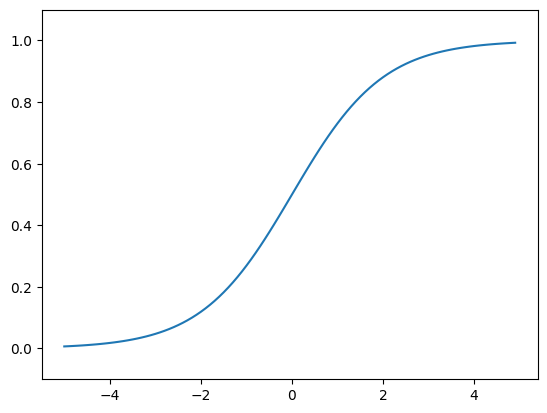

In [11]:
# 시그모이드 함수 그래프 
import numpy as np
import matplotlib.pylab as plt

# np.exp(1) : 2.718281 실수 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Tanh 함수
- 하이퍼볼릭 탄젠트 함수 사용
- 시그모이드와 비슷하지만 실수 값을 입력받아 출력값을 -1과 1 사이의 값으로 변환   
- 출력값이 -1~1 사이로 함수의 중심이 0 (zero-centered)  
  - 함수의 중심점을 0으로 옮겨 sigmoid가 갖고 있던 최적화 과정에서 느려지는 문제 해결
    - 지그재그가 덜하여 시그모이드에 비해 최적화 되었음   
- 시그모이드와 같이 기울기 소실 문제 발생   
- **은닉층에서 주로 사용** 


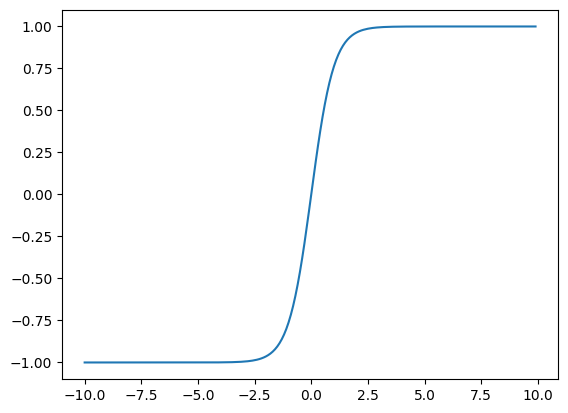

In [48]:
# tanh 함수 그래프 

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x = np.arange(-10.0, 10.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

### ReLU함수 
- Rectified Linear Unit 함수를 사용하여 
- 출력값을 0 이상의 값으로 변환   
- 입력이 양수일 경우 활성화 함수가 없는것처럼 그냥 통과시키고
- 음수일경우에 0을 만들어버림
- 0보다 큰 경우 기울기를 유지해주기 때문에 기울기 소실(gradient vanishing) 문제 해결
  - (은닉층에 많이 사용되는 이유)
- 0 이 중심(zero-centered)이 아니어서 지그재그 문제 발생  
- exp 연산이 없이 계산이 매우 간단하여 학습속도가 매우 빠르다는 장점
- **은닉층에서 주로 많이 사용**
- Leaky ReLU/PReLU/ELU 등 ReLU함수를 개선한 함수들이 있음


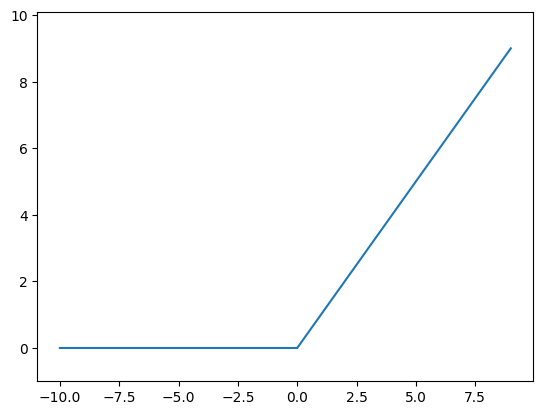

In [51]:
# ReLU 함수 그래프

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 10.1)
plt.show()

### Softmax 
- 소프트맥스 함수로 **다중클래스 분류문제에서 출력층에 주로 사용**  
- 0과 1 사이의 확률값으로 반환  
- 출력값들의 합이 1이 되는확률 분포로 정규화   
- 모든 클래스에 대한 확률을 쉽게 해석할 수 있음  
- 지수 계산 때문에 속도가 느려지는 단점    
- 따라서 소프트맥스 함수를 적용하기 전에 
- 입력 벡터의 값에 대해 선형 변환을 적용하는 것이 필요  

In [57]:
def softmax(x): 
    return np.exp(x) / np.sum(np.exp(x))

x = np.array([2, 1, -1])
output = softmax(x)

print(output)
np.sum(output)

[0.70538451 0.25949646 0.03511903]


1.0

In [ ]:
###############################################################################

## 옵티마이저

### 옵티마이저(optimizer)
- 컴파일 과정에서 씀 compile(loss='', optimizer='adam', metrics=[])
- 최소 loss를 찾는 것을 목표로 하는 최적화 알고리즘   
- 딥러닝의 핵심 알고리즘    
- 손실함수가 계산한 손실 점수를 피드백 신호로 사용하여  
- 현재 샘플의 손실 점수가 감소되는 방향으로 가중치 값을 조금씩 수정   
- 옵티마이저함수가 하이퍼파라미터 배치나 조정을 가장 적절하게 바꿔주는 역할  
  - 신경망 하이퍼파라미터
    - 은닉층의 개수, 유닛수(뉴런 개수), 활성화 함수, 층의 종류, 
    - 배치 사이즈 매개변수, 에포크 매개변수 등
  - 배치사이즈, 학습률등을 분석가가 설정한데로 진행하다가 
    - 옵티마이저 함수가 학습의 마지막쯤에서 자동으로 배치 사이즈나 학습률등을 조정 
  - 학습 데이터의 실제 결과와 모델의 예측 결과를 기반으로 
    - 오차(손실)을 잘 줄일수 있도록 만들어 주는 역할
- model 컴파일 시 배치를 위한 optimizer를 하이퍼 파라미터로 제공  
- 손실함수가 최저 손실값을 찾아가도록 하는 것이 최적화 함수 기능  

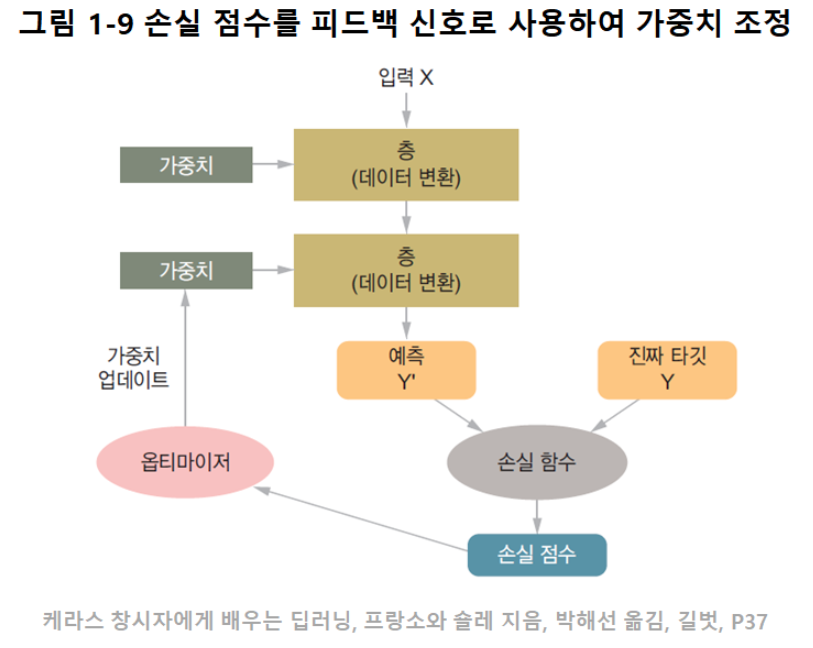

### 입력과 타깃의 매핑
- 초기에는 네트워크의 가중치가 랜덤한 값으로 할당되므로 랜덤한 변환을 연속적으로 수행
- 자연스럽게 출력은 기대한 것과 멀어지고 손실 점수가 매우 높아지는데
- 네트워크가 모든 샘플을 처리하면서 가중치가 조금씩 올바른 방향으로 조정되고 손실 점수가 감소함
- 이를 훈련 반복(training loop)이라고 함
- 충분한 횟수만큼 반복하면(일반적으로 수천 개의 샘플에서 수십 번 반복하면) 
- 손실 함수를 최소화하는 가중치 값을 산출함
- 최소한의 손실을 내는 네트워크가 가능한 타깃에 가장 가까운 출력을 만드는 모델이 됨

### 옵티마이저 종류  
- SGD (Stochastic Gradient Descent) 
- RMSprop (Root Mean Square Propagation)
- Adam (Adaptive Moment Estimation)
- AdaGrad (Adaptive Gradient) 

#### 경사하강법
- 최적화 알고리즘 중 하나
- 손실 함수(Loss function)의 값을 최소화하는 파라미터(가중치와 바이어스)를 구하기 위해 
- 손실함수에 대한 각 매개변수의 기울기를 이용하는 방법
- 최적의 가중치는 기울기=0인 지점으로 손실함수의 값이 최저인 곳  

#### 경사하강법의 종류
- SGD (Stochastic Gradient Descent): 확률적 경사하강법
- RMSprop (Root Mean Square Propagation) 
- Adam (Adaptive Moment Estimation)
- AdaGrad (Adaptive Gradient)
- 모멘텀 (Momentum)

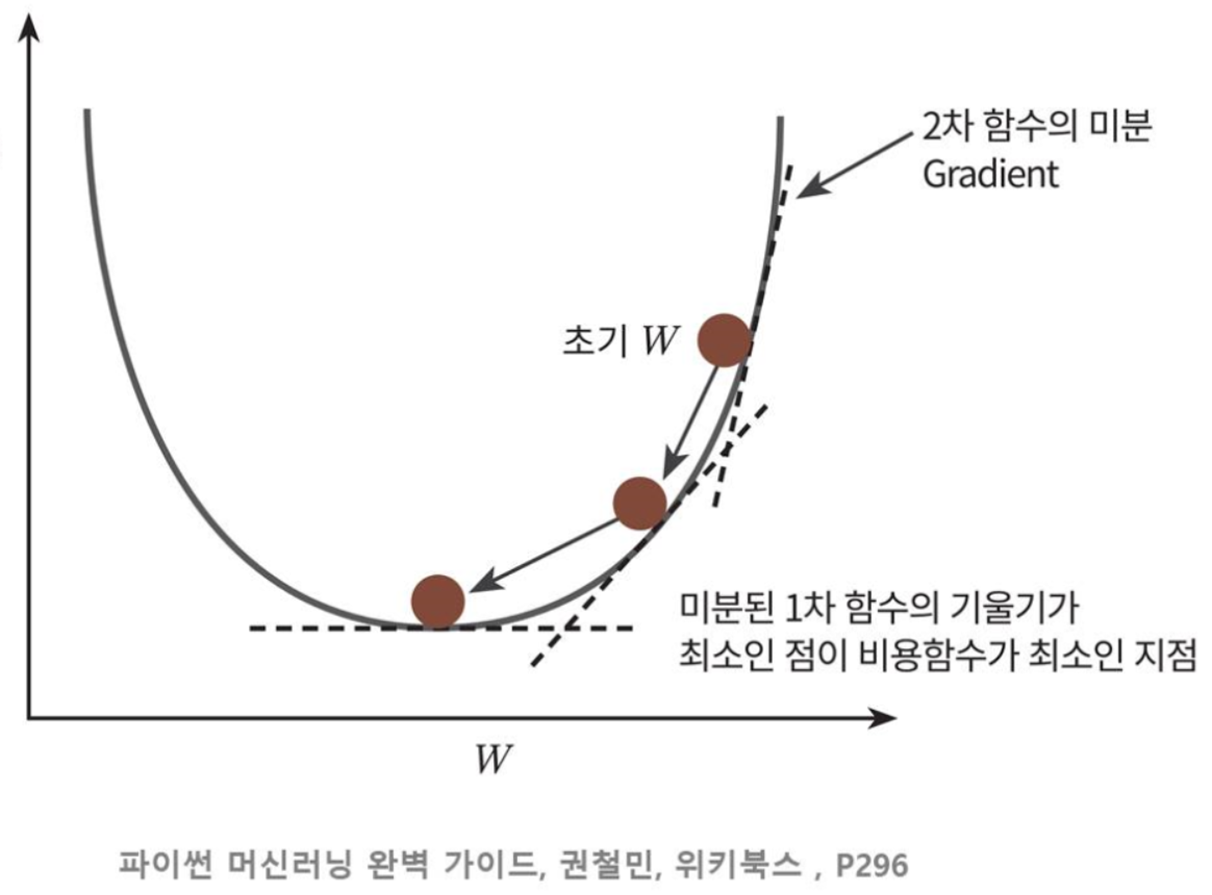

#### SGD (Stochastic Gradient Descent)
- 확률적 경사하강법
- 미분 가능한 함수에서 기울기(gradient)를 계산하여 가중치를 업데이트 
    - 이전의 경사하강법에서는 
        - 계산량이 많을 경우 속도가 느려져서 
        - 최적의 해를 찾기 전에 최적화 과정이 멈출수도 있다는 
        - 단점을 보완한 방법
    - 전체 데이터를 사용하는 것이 아니라 랜덤하게 추출한 일부 데이터를 사용
    - 속도도 빠르고 자주 업데이트 가능 

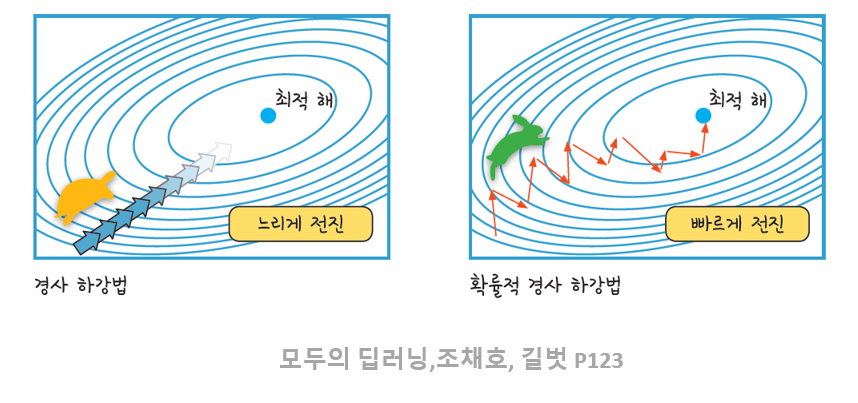

#### 경사하강법에서 momentum 파라미터  
- 모멘텀(momentum) : 관성, 탄력, 가속도의 의미   
    - 경사하강법에 탄력을 더해주는 특성    
- 관성의 방향을 고려해서 진동과 폭을 줄이는 효과 : 정확도 개선     
    - 가중치를 수정하기전 이전 수정 값과 방향(+,-)를 참고하여   
    - 같은 방향으로 일정한 비율만 수정되게 하는 방법  
    - 수정이 양(+) 방향, 음(-) 방향 순차적으로 일어나는 지그재그 현상이 줄어들고,   
      - 이전 이전 값을 고려해여 일정 비율만큼 다음 값을 결정    

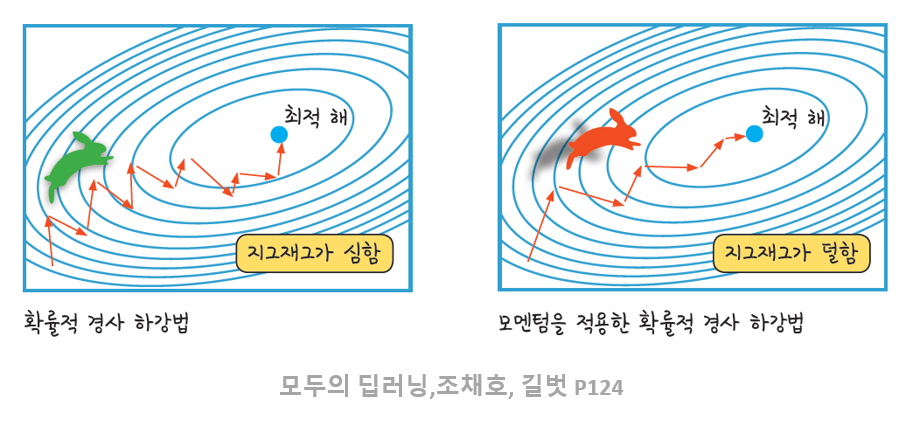

### Momentum
- 관성의 방향을 고려해 진동과 폭을 줄이는 효과   
- 확률적 경사하강법(SGD)의 높은 편차를 줄이고 수렴을 부드럽게 하기 위해 고안
- 파라미터의 분산이 줄어들고 진동을 줄일 수는 있지만 
- 모멘텀이 너무 높으면 극소점(minima)를 놓치고 건너뛰는 문제 발생  

### AdaGrad (Adaptive Gradient) 
- 학습 횟수가 증가함에 따라 학습률(Learning rate)을 조절하는 경사 하강법 
- Feature별로 학습률을 다르게 조절하는 것이 특징
- 피처의 업데이트가 잦으면 학습을 적게하여 이동 보폭을 조절 : 보폭 크기 개선  

### RMSprop (Root Mean Square Propagation)
- SGD의 단점 중 하나인 학습률을 설정하기 어려운 문제를 해결하기 위해 고안된 알고리즘. 
- 기울기 제곱의 이동평균 값을 구하여 학습률을 조절
- AdaGrad의 보폭 민감도를 보완한 방법 : 보폭 크기 개선  

### Adam (Adaptive Moment Estimation): 
- **RMSprop과 모멘텀을 결합하여 만든 최적화 알고리즘**
- 기울기 제곱과 모멘텀의 이동평균 값을 계산하여 학습률을 조절
- 정확도와 보폭 크기 개선
- Adam을 가장 많이 사용  

In [ ]:
#########################################################################

## 손실함수 (Loss Function)

### 손실 함수 
- 모델의 예측 결과와 실제값 차이(오차)를 나타내는 함수  
- 모델의 성능 평가에 사용됨 
- 모델 학습에 필요한 가중치를 업데이트 하여 손실 함수를 최소화하는 방향으로 최적화 수행 
- model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 손실함수 종류
- Binary Crossentropy : 이진 분류 모델에서 사용
- Categorical Crossentropy : 다중 분류 모델에서시 사용
- Sparse Categorycal Corssentropy : 라벨값이 정수인 경우의 다중 분류 모델에서 사용 
- MSE(Mean Squared Error)
    - 회귀 모델에서 사용 (실제값과 예측값의 차이를 제곱해 평균한 것)
- MAE(Mean Aosolute Error) 
    - 회귀 모델에서 사용 (실제값과 예측값의 차이를 절대값으로 변환/평균한 것)

### 손실함수 파라미터 값 
- binary_crossentropy
- categorical_crossentropy
- sparse_categorical_crossentropy
- mean-squared_error
- mean_absolute_error 

In [ ]:
# 지금까지 했던 예제
(1) AND/OR : 2진 분류
(2) 정형 데이터 : 2진 분류
(3) 손글씨 이미지 : 다중 클래스 분류
(4) 이미지 2진 분류 / 다중 클래스 분류 / 회귀 모델(주택 가격 예측) 연습문제
(5) 영화리뷰 : 2진 분류
(6) 뉴스 기사 분류 : 다중 클래스 분류
--------------------------------
(1) 이미지 분류
(2) 자연어 처리

In [ ]:
[프로젝트 진행하게 되면]
머신러닝
- 분류 / 회귀 예측

딥러닝 
- 이미지 분류
- 자연어 처리 (감성분류)